In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skewnorm
from scipy.stats import norm

import numpy as np
import pickle

from src.prediction import construct_predictions
from src.utils import gather_data

## Load data and construct predictions

- **Width** data is a 4D array "indexed" by
(delta, module, dimension, trial)
- **Prediction** data is a 3D array "indexed" by (modules, dimensions, delta)


In [3]:
path = "./data/1D_fitting"

W = gather_data(path, "width")
W = W[0,:,:,:]
log_mean = np.mean(np.log(W), axis=2)
log_std  = np.std(np.log(W), axis=2)

In [4]:
X = W[:,0,:]
logX = np.log(X)
x = np.linspace(np.amin(logX), np.amax(logX), num=100, endpoint=True)

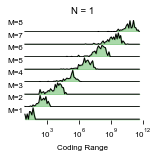

In [5]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, axs = plt.subplots(figsize=(2., 2.), ncols=1, nrows=8, sharex=True,  tight_layout = {"pad": 0})

axs[7].set_xlabel("Coding Range")
axs[0].set_title("N = 1")
for m_ in range(8):
    m = m_ + 1
    
    ax = axs[7 - m_]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ylabel = ax.set_ylabel("M={}".format(m))
    ylabel.set_rotation(0)
    ax.set_yticks([])
    ax.set_xscale("log")
    
    h,_ = np.histogram(X[m_,:], bins=np.exp(x))

    ax.plot(np.exp(x[:-1]), h, alpha=1., color="black", linewidth=1.)
    ax.fill_between(np.exp(x[:-1]), h, y2=0, color="C2", alpha=.4)


plt.savefig("./Figures/S1Fig_1d_distr.pdf", dpi=300, transparent=True)

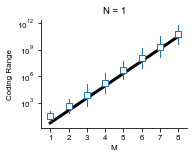

In [6]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})

fig, ax = plt.subplots(figsize=(2.5, 2.), ncols=1, nrows=1, sharex=True,  tight_layout = {"pad": 0})

ax.set_ylabel("Coding Range")

ms = np.arange(1,9)
ax.set_title("N = 1")
ax.set_xticks(ms)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("M")
ax.set_yscale("log")

ax.set_xticks(ms)
ax.set_xlim(0.5,ms[-1]+.5)




k  = 1
k_ = k - 1
valid = np.where(2*ms>=k)[0] 
a = np.exp(log_mean - 2*log_std)[valid,k_]
b = np.exp(log_mean)[valid,k_]
c = np.exp(log_mean + 2*log_std)[valid,k_]


p = 0.2 * (1./(0.2**2))**ms



ax.plot(ms[valid], p[valid], 
                color="black",
                linewidth= 3,
                linestyle="-",
            alpha=1.,
                marker="None", markersize=8 , markerfacecolor="cyan") 

ax.plot( [ms[valid],ms[valid]] ,[a,c], linewidth=1.,color="C0",linestyle="-", alpha=1.)
ax.plot(ms[valid], b, 
        marker="s", color="C0", 
        markerfacecolor= "white",
        markersize=6,
        markeredgewidth=1.,
        linewidth=1., 
        linestyle="none")
  
plt.savefig("./Figures/S1Fig_1d_bench.pdf", dpi=300, transparent=True)